<a href="https://colab.research.google.com/github/DevEnriquegd/ca-alura-store/blob/main/AluraStore_JEGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [93]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [94]:
tienda['ID_Tienda'] = 'Tienda 1'
tienda2['ID_Tienda'] = 'Tienda 2'
tienda3['ID_Tienda'] = 'Tienda 3'
tienda4['ID_Tienda'] = 'Tienda 4'

df_consolidado = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_consolidado.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ID_Tienda
1705,Olla de presión,Artículos para el hogar,58000.0,7900.0,02/12/2021,Izabela de León,Medellín,4,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 1
6300,Balón de baloncesto,Deportes y diversión,53200.0,1000.0,01/06/2022,Felipe Santos,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 3
8945,Microondas,Electrodomésticos,785600.0,42200.0,14/01/2022,Juliana Costa,Neiva,2,Tarjeta de crédito,10,2.92730,-75.28189,Tienda 4
5344,Mesa de noche,Muebles,250400.0,13600.0,10/06/2021,Ángel Rodriguez,Santa Marta,1,Tarjeta de crédito,1,11.24079,-74.19904,Tienda 3
7550,Impresora,Electrónicos,364800.0,17600.0,10/08/2020,Beatriz Morales,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
5152,Auriculares con micrófono,Electrónicos,94300.0,3200.0,06/07/2021,Izabela de León,Bogotá,4,Nequi,1,4.60971,-74.08175,Tienda 3
7417,Dinosaurio Rex,Juguetes,21500.0,2200.0,17/12/2022,Ángel Rodriguez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
1581,Pandereta,Instrumentos musicales,79800.0,4500.0,20/12/2022,Lucas Olivera,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 1
3364,Ciencia de datos con Python,Libros,39700.0,2800.0,05/11/2022,Beatriz Morales,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 2
5970,Guitarra acústica,Instrumentos musicales,249900.0,14000.0,18/12/2020,Juliana Costa,Pereira,4,Tarjeta de crédito,4,4.81333,-75.69611,Tienda 3


#1. Análisis de facturación



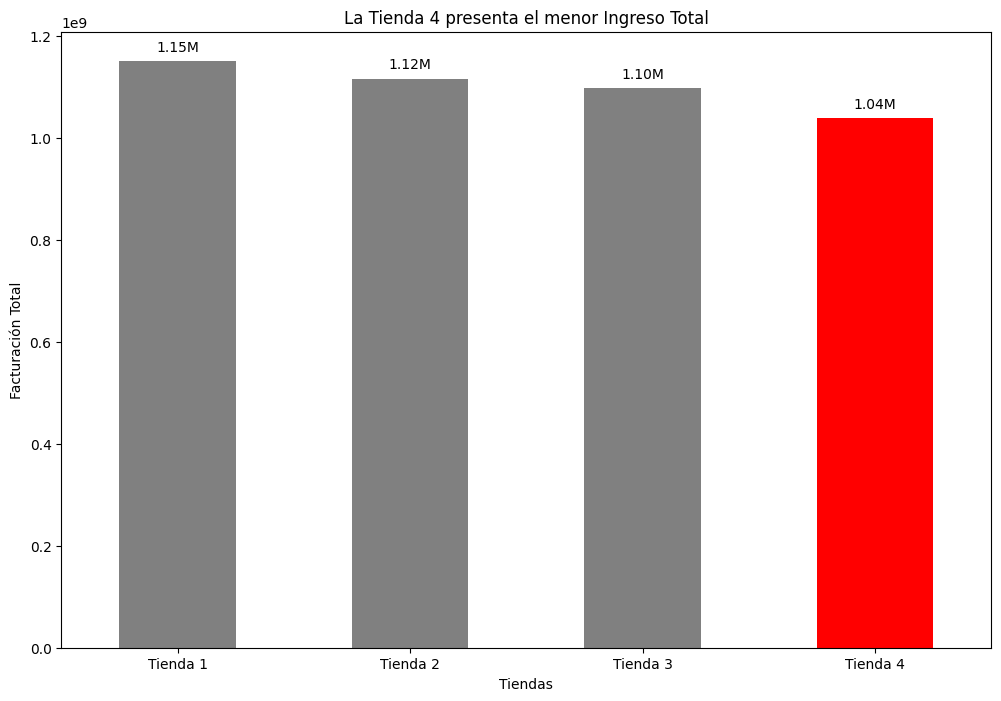

In [95]:
facturacion_por_tienda = df_consolidado.groupby('ID_Tienda')['Precio'].sum()

facturacion_por_tienda = facturacion_por_tienda.sort_values(ascending=False)

mejor_tienda_facturacion = facturacion_por_tienda.iloc[0]

facturacion_tienda4 = facturacion_por_tienda['Tienda 4']
diferencia_porcentual = (mejor_tienda_facturacion - facturacion_tienda4) / mejor_tienda_facturacion * 100

nombre_mejor_tienda = facturacion_por_tienda.index[0]

titulo_principal = f"La Tienda 4 presenta el menor Ingreso Total"

colores = ['grey'] * len(facturacion_por_tienda)
tienda4_posicion = facturacion_por_tienda.index.get_loc('Tienda 4')
colores[tienda4_posicion] = 'red'

ax = facturacion_por_tienda.plot(
    kind='bar',
    figsize=(12, 8),
    color=colores,
    xlabel='Tiendas',
    ylabel='Facturación Total',
    title=titulo_principal
)

for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e9:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

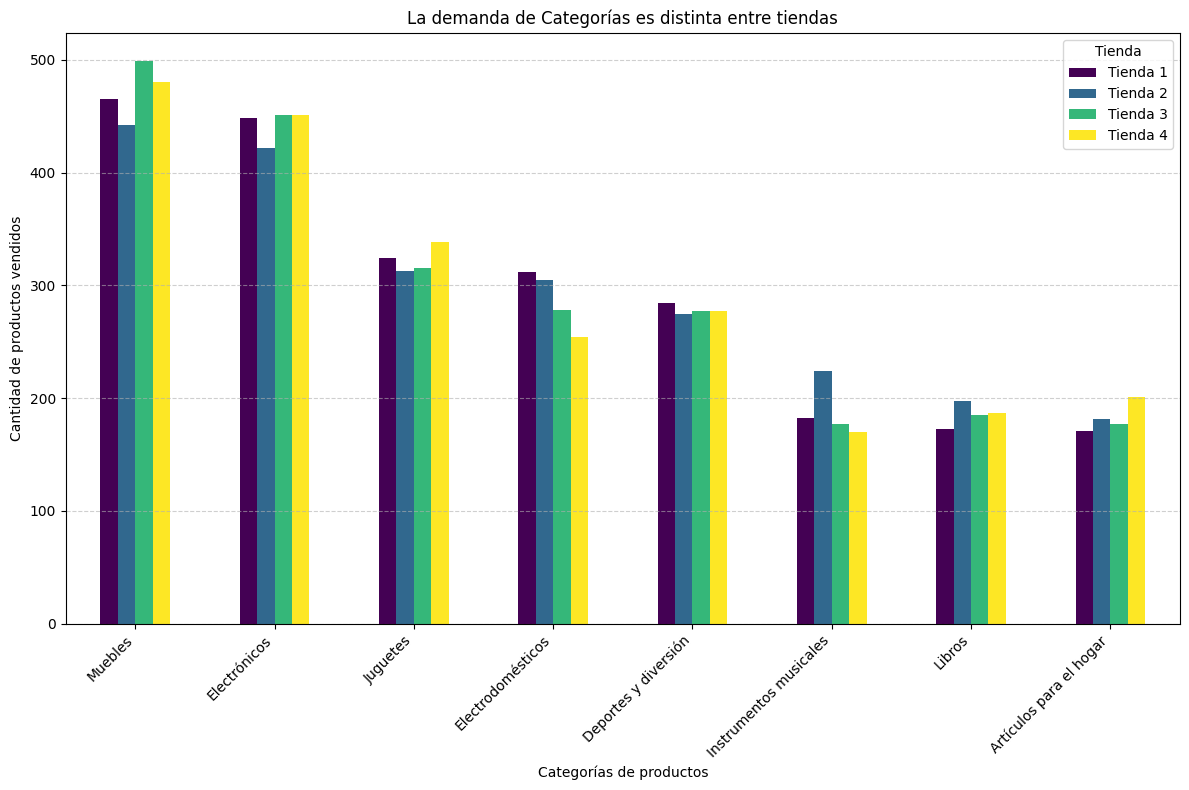

In [96]:
df_ventas_comparativas = df_consolidado.groupby(['Categoría del Producto', 'ID_Tienda']).size().unstack(fill_value=0)

df_ventas_comparativas['Total_Ventas'] = df_ventas_comparativas.sum(axis=1)
df_top_categorias = df_ventas_comparativas.nlargest(8, 'Total_Ventas').drop(columns=['Total_Ventas'])

ax = df_top_categorias.plot(
    kind='bar',
    figsize=(12, 8),
    title="La demanda de Categorías es distinta entre tiendas",
    ylabel="Cantidad de productos vendidos",
    xlabel="Categorías de productos",
    colormap='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


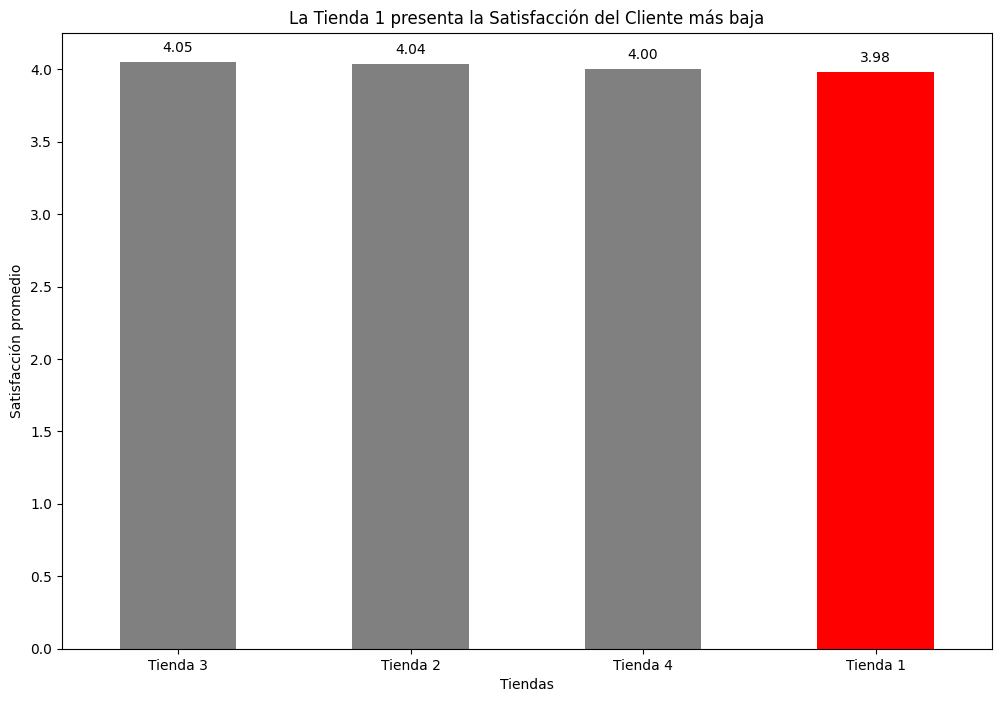

In [97]:
calificacion_promedio_por_tienda = df_consolidado.groupby('ID_Tienda')['Calificación'].mean().round(2)

calificacion_promedio_por_tienda = calificacion_promedio_por_tienda.sort_values(ascending=False)

peor_tienda_calificacion = calificacion_promedio_por_tienda.iloc[-1]
nombre_peor_tienda = calificacion_promedio_por_tienda.index[-1]
mejor_tienda_calificacion = calificacion_promedio_por_tienda.iloc[0]

titulo_principal = f"La {nombre_peor_tienda} presenta la Satisfacción del Cliente más baja"

colores = ['grey'] * len(calificacion_promedio_por_tienda)

posicion_peor_tienda = calificacion_promedio_por_tienda.index.get_loc(nombre_peor_tienda)
colores[posicion_peor_tienda] = 'red'

ax = calificacion_promedio_por_tienda.plot(
    kind='bar',
    figsize=(12, 8),
    color=colores,
    xlabel='Tiendas',
    ylabel='Satisfacción promedio',
    title=titulo_principal
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 4. Productos más y menos vendidos

/tmp/ipython-input-4128660060.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(obtener_ranking_tienda)


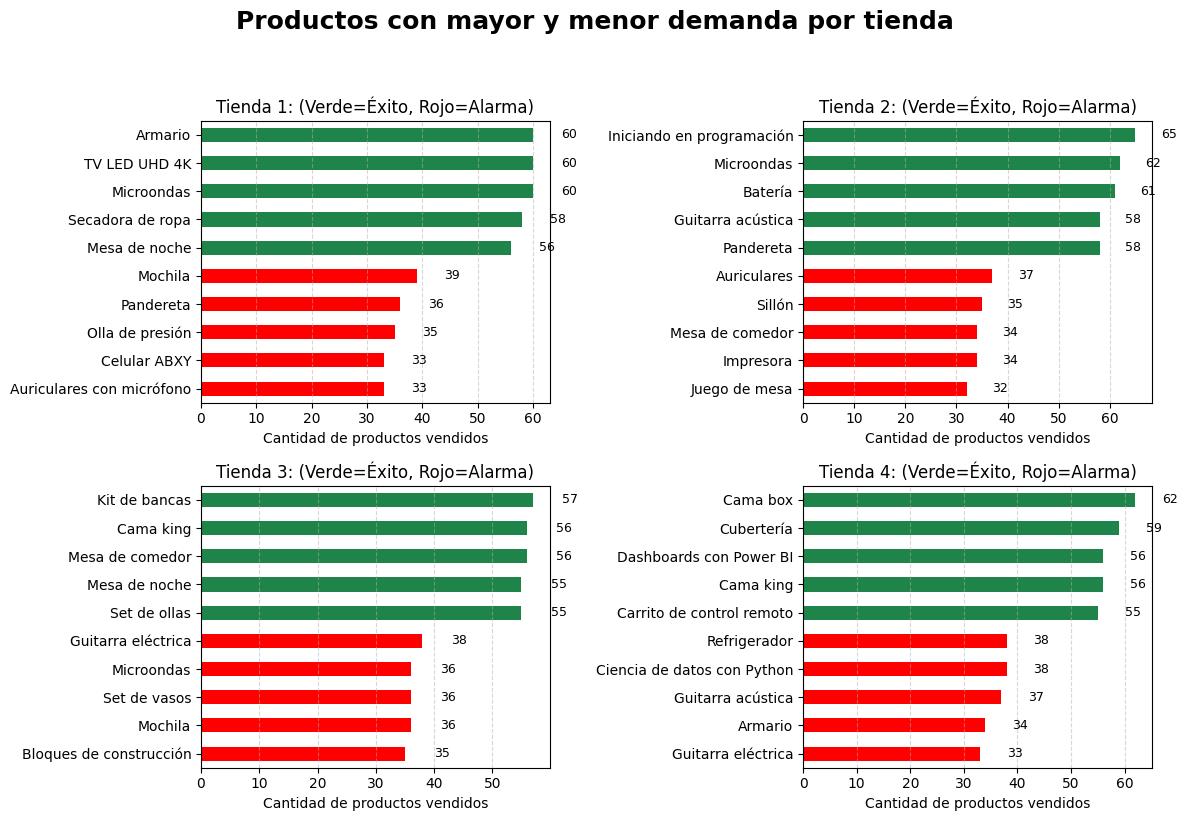

In [98]:
df_conteo_productos = df_consolidado.groupby(['ID_Tienda', 'Producto']).size().reset_index(name='Ventas')

def obtener_ranking_tienda(df_tienda, n_top=5, n_flop=5):
    ranking = df_tienda.sort_values(by='Ventas', ascending=False)

    return pd.concat([ranking.head(n_top), ranking.tail(n_flop)])

df_ranking_final = (
    df_conteo_productos.groupby('ID_Tienda')
    .apply(obtener_ranking_tienda)
    .reset_index(drop=True)
)

COLOR_TOP = '#1E8449'
COLOR_FLOP = 'red'

colores_paleta_corregida = [COLOR_FLOP] * 5 + [COLOR_TOP] * 5

titulo_general = "Productos con mayor y menor demanda por tienda"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.suptitle(titulo_general, fontsize=18, fontweight='bold', y=1.02)

for i, (tienda_id, ax) in enumerate(zip(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], axes.flatten())):
    df_tienda = df_ranking_final[df_ranking_final['ID_Tienda'] == tienda_id]

    df_tienda = df_tienda.sort_values(by='Ventas', ascending=True)

    titulo_panel = f'{tienda_id}: (Verde=Éxito, Rojo=Alarma)'

    df_tienda.set_index('Producto')['Ventas'].plot(
        kind='barh',
        ax=ax,
        color=colores_paleta_corregida,
        title=titulo_panel
    )

    for j, v in enumerate(df_tienda['Ventas']):
        ax.text(v + 5, j, f'{v:,.0f}', va='center', fontsize=9)

    ax.set_xlabel("Cantidad de productos vendidos")
    ax.set_ylabel("")
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

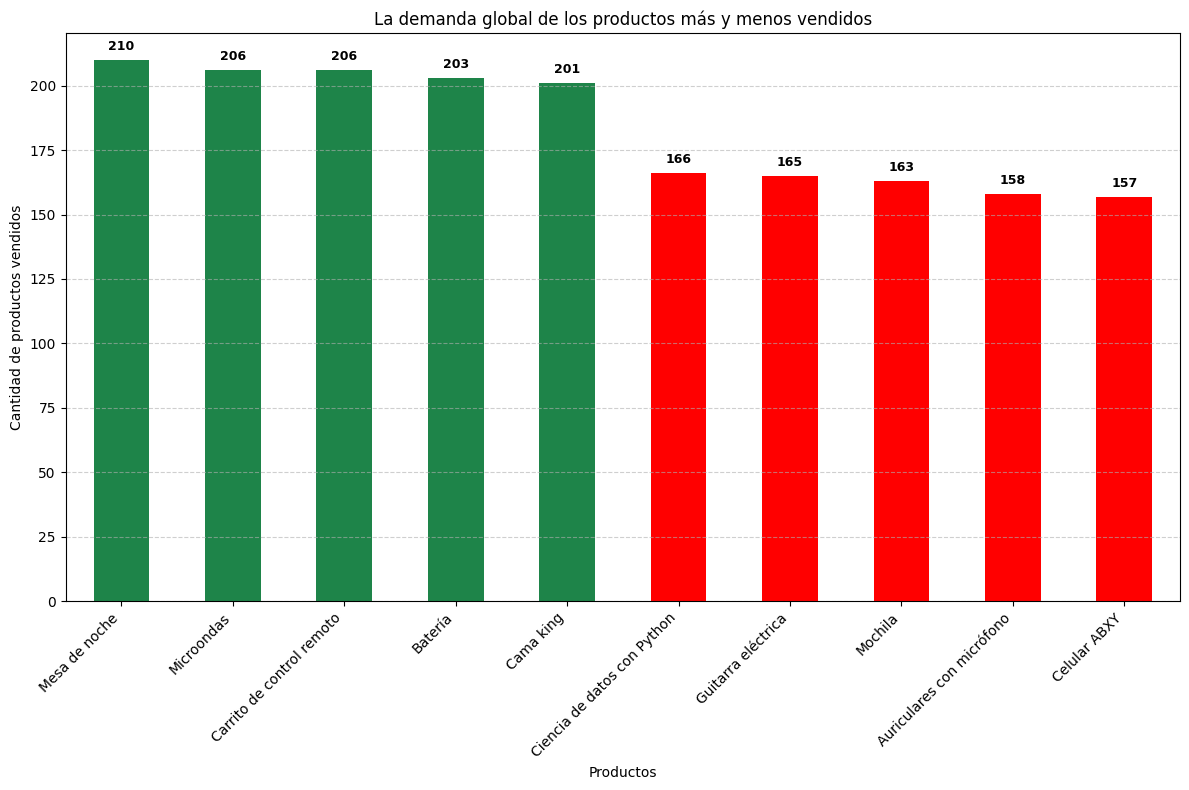

In [99]:
ventas_por_producto_global = df_consolidado.groupby('Producto').size().reset_index(name='Ventas')

N = 5
ranking_global = ventas_por_producto_global.sort_values(by='Ventas', ascending=False)

top_5_productos = ranking_global.head(N)

flop_5_productos = ranking_global.tail(N)

df_ranking_absoluto = pd.concat([top_5_productos, flop_5_productos])

colores_ranking = ['#1E8449'] * N + ['red'] * N

df_ranking_absoluto = df_ranking_absoluto.sort_values(by='Ventas', ascending=False)
df_ranking_absoluto.set_index('Producto', inplace=True)

ax = df_ranking_absoluto['Ventas'].plot(
    kind='bar',
    figsize=(12, 8),
    color=colores_ranking,
    title="La demanda global de los productos más y menos vendidos",
    ylabel="Cantidad de productos vendidos",
    xlabel="Productos"
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

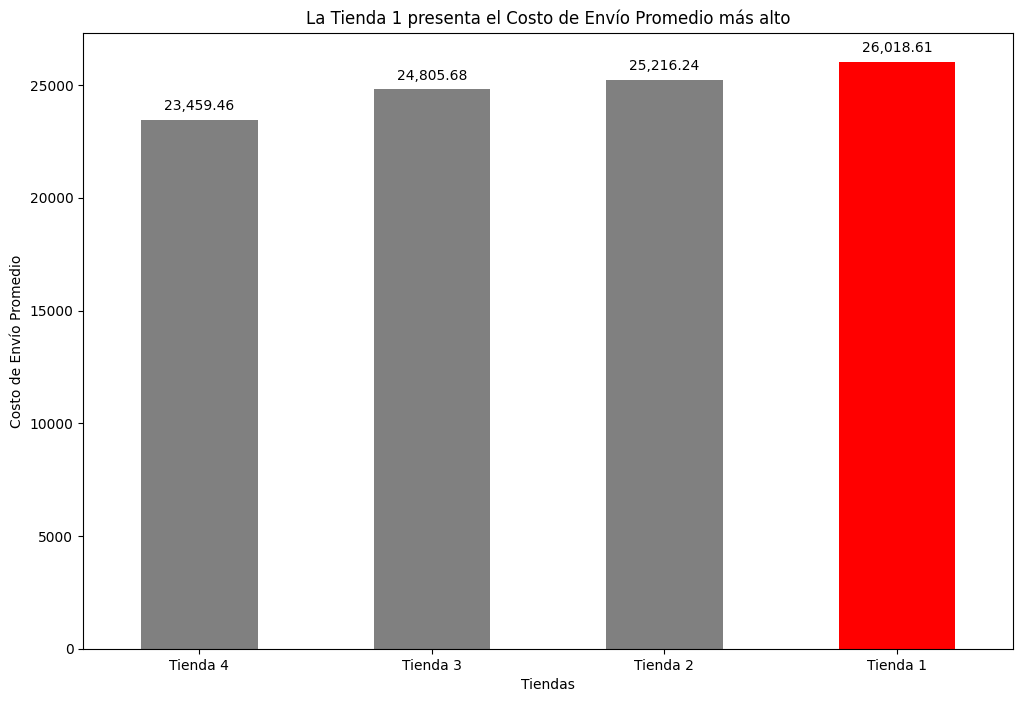

In [100]:
costo_envio_promedio = df_consolidado.groupby('ID_Tienda')['Costo de envío'].mean().round(2)

costo_envio_promedio = costo_envio_promedio.sort_values(ascending=True)

tienda_mayor_costo = costo_envio_promedio.index[-1]
valor_mayor_costo = costo_envio_promedio.iloc[-1]

titulo_logistico = f"La {tienda_mayor_costo} presenta el Costo de Envío Promedio más alto"

colores = ['gray'] * len(costo_envio_promedio)
posicion_mayor_costo = costo_envio_promedio.index.get_loc(tienda_mayor_costo)
colores[posicion_mayor_costo] = 'red'

ax = costo_envio_promedio.plot(
    kind='bar',
    figsize=(12, 8),
    color=colores,
    xlabel='Tiendas',
    ylabel='Costo de Envío Promedio',
    title=titulo_logistico
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 6. Informe Final: Evaluación Estratégica de Tiendas – Alura Store

## 1. Inicio: Contexto y el Verdadero Problema

La cadena **Alura Store** busca optimizar su portafolio de negocios mediante la **venta de una de sus cuatro tiendas** para financiar un nuevo emprendimiento.  
El análisis va más allá del ingreso total: se integran **factores de rendimiento, reputación, estructura de demanda y eficiencia operativa**, con el objetivo de determinar qué tienda presenta **menor potencial de mejora** y, por tanto, debería ser vendida.

**Indicadores Analizados:**
- Ingreso total de cada tienda (**rendimiento económico**).  
- Calificación promedio de los clientes (**reputación**).  
- Demanda y rotación de productos (**estructura del inventario**).  
- Costo promedio de envío (**eficiencia logística**).

Inicialmente, la **Tienda 4** se presenta como candidata obvia por su baja facturación. Sin embargo, el análisis completo busca identificar **la debilidad estructural real**, no solo la menor cifra.

---

## 2. Desarrollo: Desmontando el Riesgo y Encontrando el Valor

El análisis comparativo muestra que las **Tiendas 1 y 4** representan los extremos del problema, aunque por motivos distintos:  
la Tienda 1 es **ineficiente pero recuperable**, mientras que la Tienda 4 es **económicamente débil y estructuralmente limitada**.

---

### 🔹 Gráfico 1: Rendimiento Económico — Facturación Total
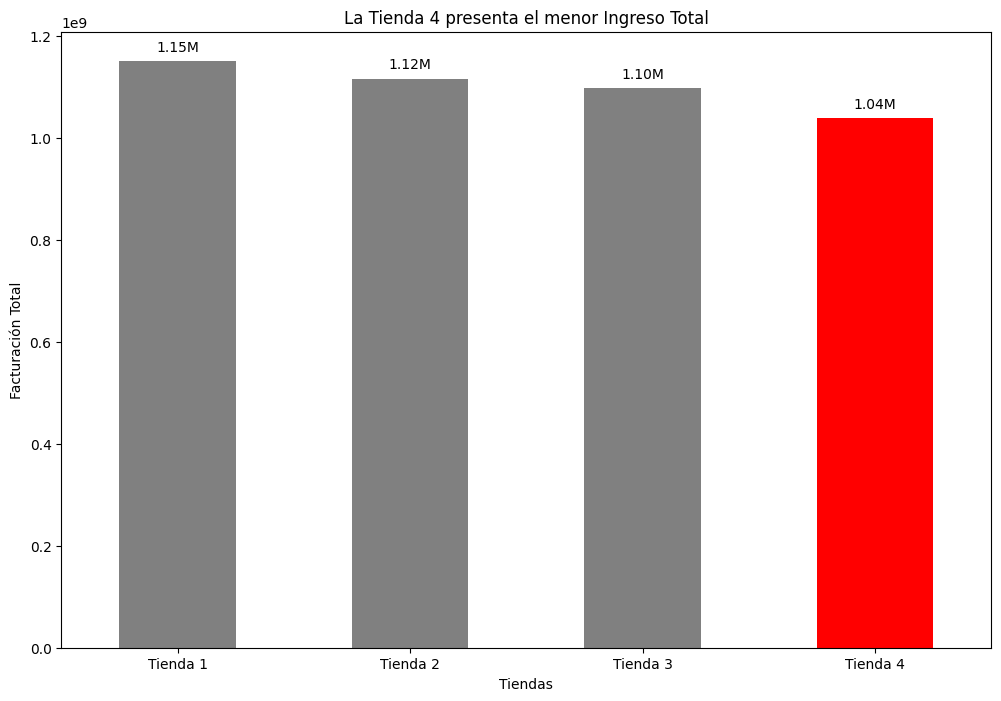

**Hallazgo:**  
La **Tienda 4** obtiene el menor ingreso total (S/ 1.038 billones), un **9.8% inferior** a la líder.  

**Conclusión:**  
Su bajo desempeño financiero revela **una debilidad estructural de demanda** difícil de revertir sin reposicionar completamente el negocio.

---

### 🔹 Gráfico 2: Reputación — Calificación Promedio
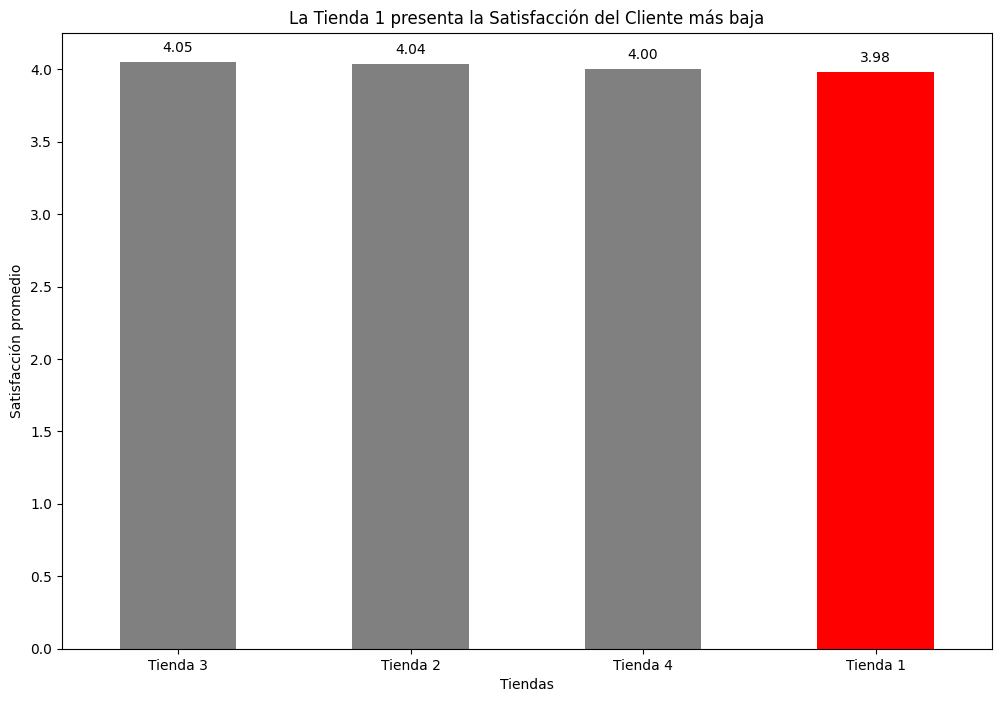

**Hallazgo:**  
La Tienda 1 tiene la menor calificación (3.98), mientras que la Tienda 3 lidera con 4.05.  

**Interpretación:**  
La diferencia de **0.07 puntos** es marginal. Los problemas de servicio y atención al cliente son **operativos y corregibles**, no estructurales.

---

### 🔹 Gráfico 3: Logística — Costo Promedio de Envío
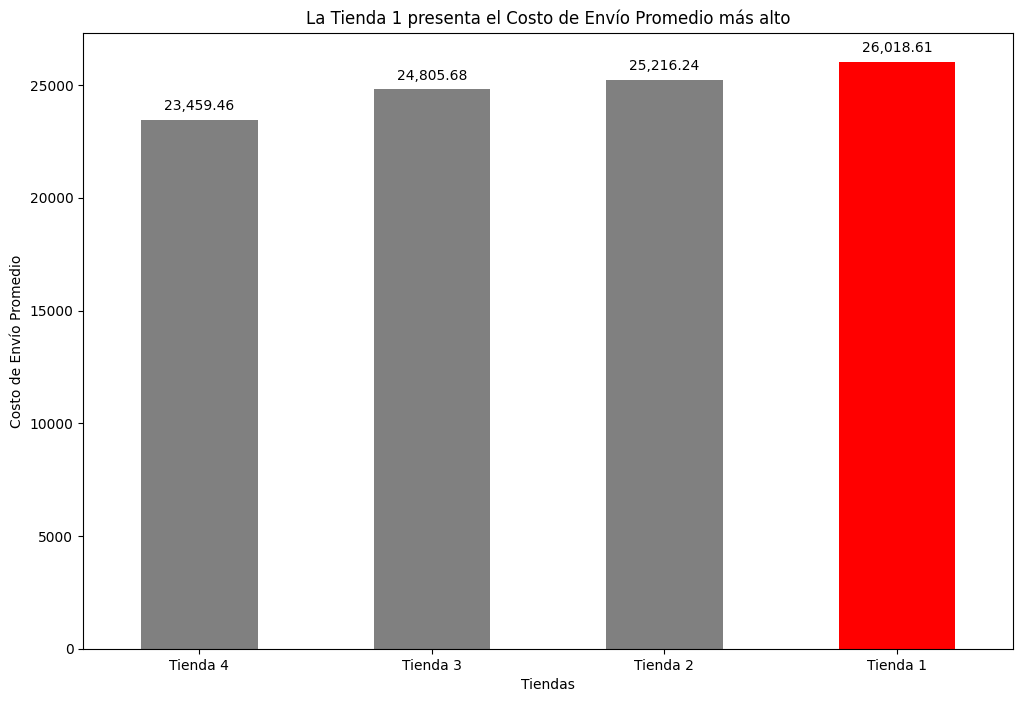

**Hallazgo:**  
La Tienda 1 soporta el costo de envío promedio más elevado, mientras que la Tienda 4 tiene el más bajo.  

**Interpretación:**  
Aunque no afecta directamente la rentabilidad, evidencia **ineficiencia operativa**. Este riesgo es **totalmente optimizable** con acuerdos logísticos o ajustes internos.

---

### 🔹 Gráfico 4: Estructura de la Demanda por Categoría
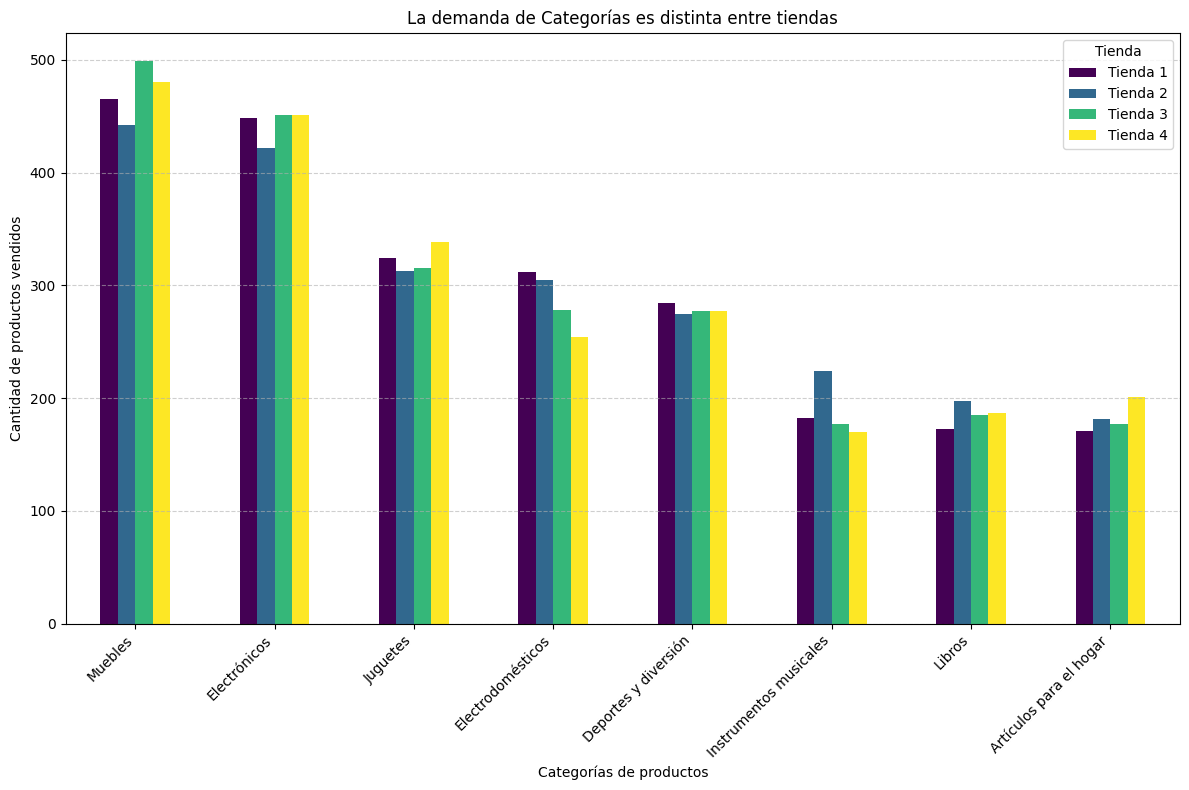

**Hallazgo:**  
Las categorías más demandadas son **Muebles** y **Electrónicos**, mientras que **Libros** y **Artículos para el hogar** presentan menor tracción.  

**Análisis:**  
La Tienda 4 muestra **dependencia alta en pocas categorías** (Muebles y Juguetes), lo que limita su flexibilidad comercial.  
En contraste, las Tiendas 1 y 3 mantienen una demanda más balanceada, lo que **reduce el riesgo ante variaciones del mercado**.

---

### 🔹 Gráfico 5: Desempeño de Productos
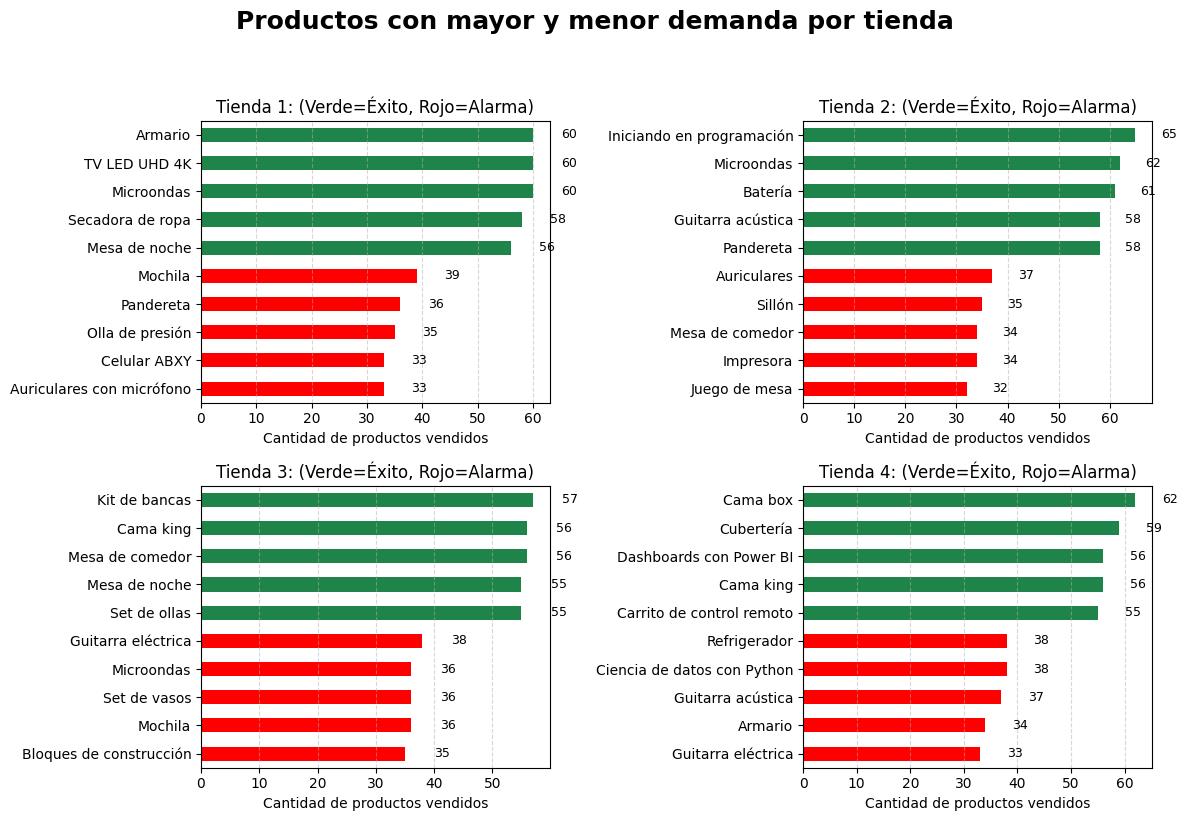

**Hallazgo:**  
- **Tienda 1**: Alta demanda en productos de gran valor (muebles, electrodomésticos).  
- **Tienda 3**: Mix sólido entre hogar y entretenimiento.  
- **Tienda 4**: Los productos exitosos son pocos y concentrados; los de baja demanda superan en número a los de alta rotación.

**Conclusión:**  
La Tienda 4 no solo factura menos, sino que **carece de diversificación en productos exitosos**, lo que agrava su bajo rendimiento estructural.

---

## 3. Conclusión: El Veredicto y la Recomendación Final

La decisión se resume así: **vender ineficiencia recuperable (Tienda 1) o debilidad estructural (Tienda 4)**.

| Característica | Tienda 1 (Ineficiente pero Recuperable) | Tienda 4 (Económica pero Estructuralmente Débil) |
|----------------|-------------------------------------------|--------------------------------------------------|
| **Facturación** | Alta — Líder en ingresos brutos | Baja — 9.8% menos que la líder |
| **Problema Principal** | Ineficiencias operativas (servicio y logística) | Falta de tracción comercial y posicionamiento |
| **Potencial de Mejora** | Alto — Requiere ajustes internos | Bajo — Requiere reestructuración y reposicionamiento |
| **Riesgo Operativo** | Controlable | Estructural |

---

### 🟩 **Recomendación Final: Vender la Tienda 4**

**Justificación Estratégica:**
- **Bajo Potencial de Crecimiento:** La Tienda 4 tiene un rendimiento bajo y una demanda concentrada en pocas categorías.  
- **Alto Costo de Recuperación:** Implica inversión en reposicionamiento y marketing con retorno incierto.  
- **Oportunidad en Tienda 1:** A pesar de sus debilidades operativas, la T1 tiene **alto ingreso y clientela activa**, por lo que optimizarla genera mayor valor futuro.

**Conclusión General:**  
Vender la **Tienda 4** permite liberar capital de un activo con **poco potencial de crecimiento**, enfocando los recursos en **fortalecer las tiendas de mayor tracción y eficiencia corregible**.  
Esta estrategia asegura la **rentabilidad sostenible** y el **crecimiento futuro** del grupo **Alura Store**.


# 7. Extra: Análisis de desempeño geográfico

In [101]:
import geopandas as gpd
from shapely.geometry import Point

import folium
from folium.plugins import HeatMap

from IPython.display import display

In [102]:
tiendas_data = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_data.items():
    print(f"Generando mapa para {nombre}...")

    # Crear GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
    entregas_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    # Crear y centrar el mapa
    mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12, tiles='CartoDB Positron')

    # Agregar el HeatMap
    HeatMap(data=entregas_gdf[['lat', 'lon']].dropna().values.tolist()).add_to(mapa)

    # Añadir un marcador con el centro de la tienda
    folium.Marker(
        [df['lat'].mean(), df['lon'].mean()],
        popup=f"Centro de {nombre}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

    # Mostrar explícitamente el mapa
    display(mapa)

Generando mapa para Tienda 1...


Generando mapa para Tienda 2...


Generando mapa para Tienda 3...


Generando mapa para Tienda 4...
